In [27]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
from pypalettes import get_hex
plt.style.use('seaborn-v0_8-whitegrid')
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

# Load Training Dataset

In [29]:
train_data = pd.read_csv('../data/titanic/train.csv')
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [30]:
train_data.shape

(891, 12)

# Describe

In [31]:
train_describe_numeric = train_data.describe()
train_describe_numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
print('Survival rate is ', train_describe_numeric.loc['mean', 'Survived'])

Survival rate is  0.3838383838383838


In [33]:
train_data['Survived'].astype('category', copy=False).value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

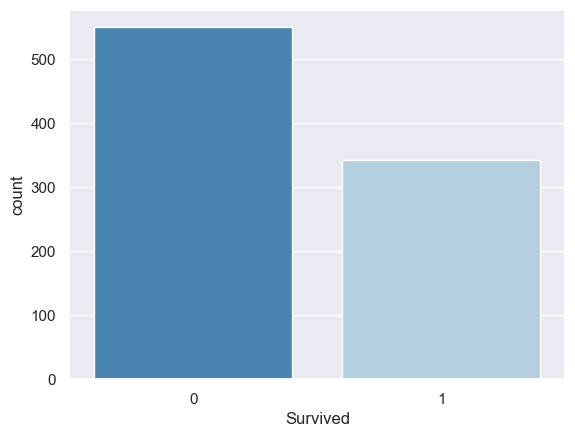

In [34]:
sns.countplot(data=train_data, x='Survived', palette = 'Blues_r')

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Drop Unnecessary Columns

In [36]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked']

train_data = train_data.drop(columns_to_drop, axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


# Column Datatype Change

In [37]:
# train_data['Survived'] = train_data['Survived'].astype('category', copy=False)
train_data['Pclass'] = train_data['Pclass'].astype('category', copy=False)
train_data['Sex'] = train_data['Sex'].astype('category', copy=False)

# More Describe

In [38]:
# train_describe_object = train_data.describe(include=['O'])
# train_describe_object

In [39]:
train_describe_categorical = train_data.describe(include=['category'])
train_describe_categorical

,Pclass,Sex
count,891,891
unique,3,2
top,3,male
freq,491,577


In [40]:
print('Majority Gender : ', train_describe_categorical.loc['top', 'Sex'])
print('Their Count : ', train_describe_categorical.loc['freq', 'Sex'])

Majority Gender :  male
Their Count :  577


# Missing Values

<Axes: >

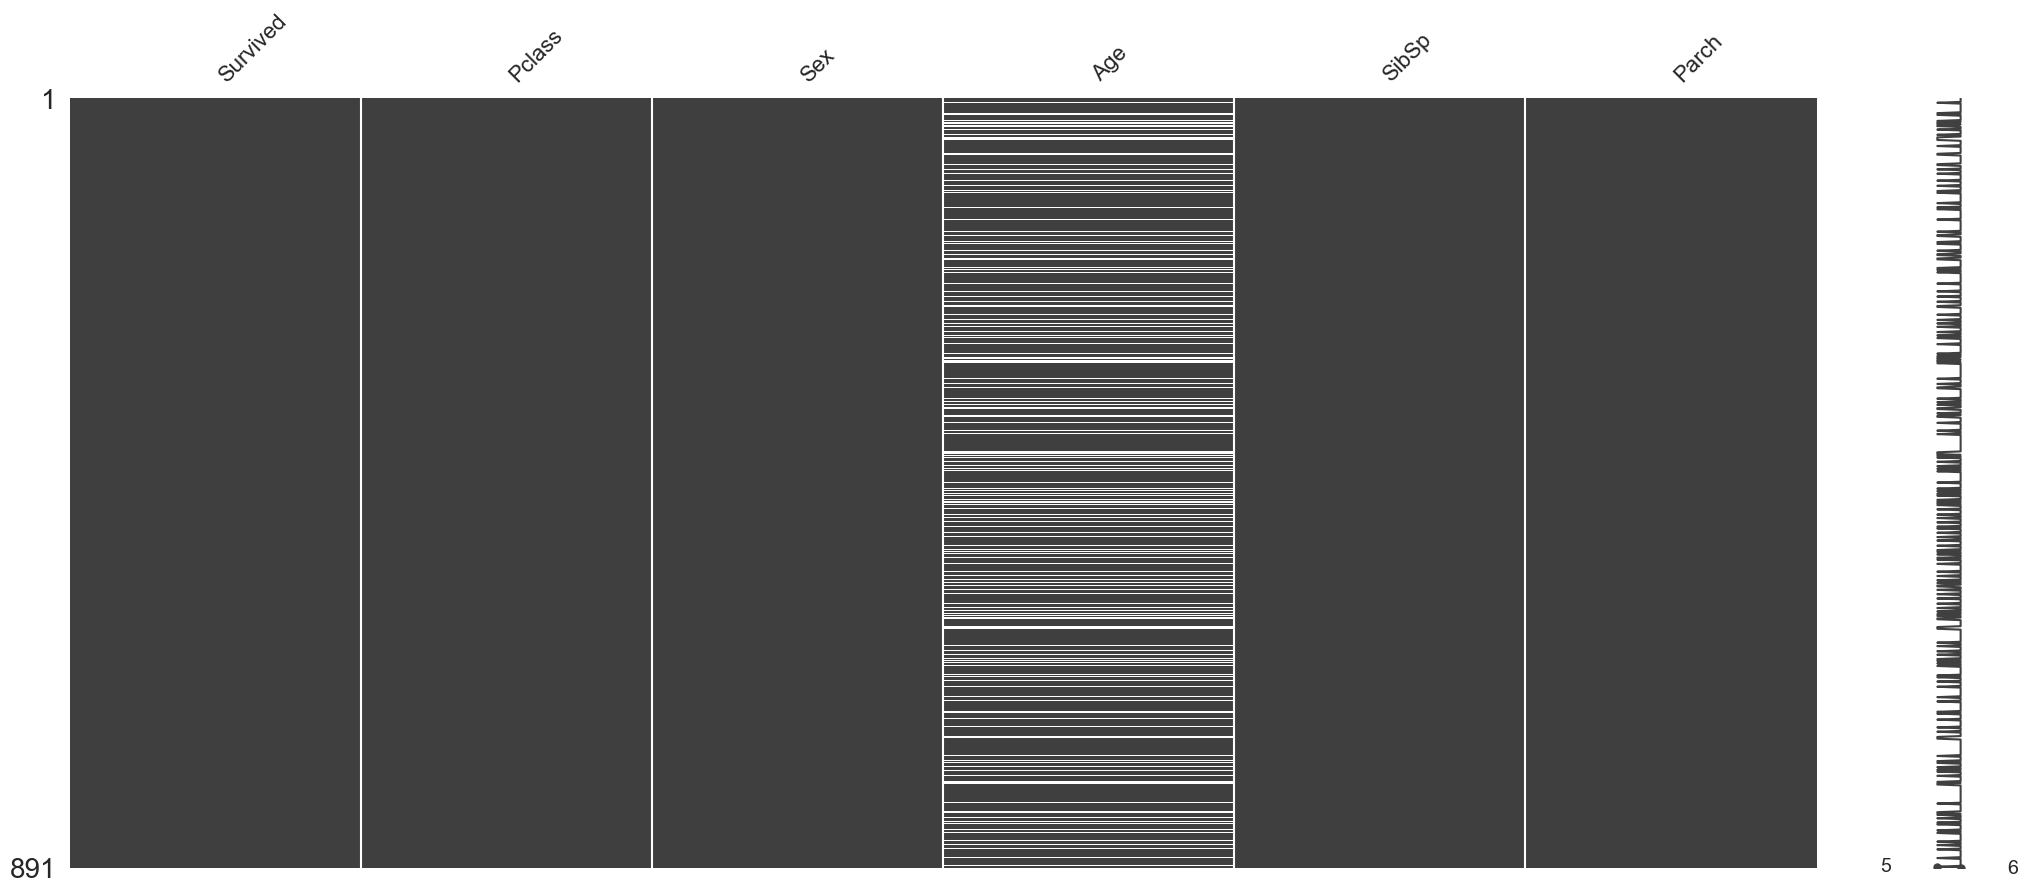

In [41]:
import missingno as msno
msno.matrix(train_data)

In [42]:
from common import null_table

null_table_train = null_table(train_data)

null_table_train.sort_values(
    by='Percentage', 
    ascending=False
)

,Columns,Null Count,Percentage
0,Age,177,19.86532
1,Survived,0,0.00000
2,Pclass,0,0.00000
3,Sex,0,0.00000
4,SibSp,0,0.00000
5,Parch,0,0.00000


In [43]:
mean_age = train_data['Age'].mean()
train_data['Age'] = train_data['Age'].fillna(mean_age)

# Create New Features

## Family Type

In [44]:
train_data["Family_Size"] = train_data['SibSp'] + train_data['Parch'] + 1

In [45]:
no_of_bins = 5

train_data['Family_Type'] = pd.cut(
    train_data['Family_Size'], 
    no_of_bins, 
    labels=np.arange(no_of_bins)
)

<Axes: xlabel='Family_Type', ylabel='count'>

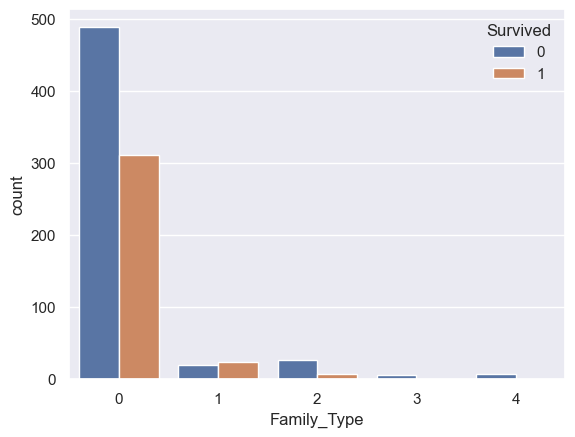

In [46]:
sns.countplot(
    x="Family_Type", 
    hue="Survived", 
    data=train_data
)

In [47]:
train_data = train_data.drop(
    ['SibSp', 'Parch', 'Family_Size'], 
    axis=1
)

## Age Group

In [48]:
no_of_bins = 5

train_data['Age_Group'] = pd.cut(
    train_data['Age'], 
    no_of_bins, 
    labels=np.arange(no_of_bins)
)

In [49]:
train_data = train_data.drop('Age', axis=1)

# Class Imbalance

In [50]:
from sklearn.utils import resample

# separate majority and minority classes
majority = train_data[train_data['Survived'] == 0]
minority = train_data[train_data['Survived'] == 1]

# oversample the minority class
minority_oversampled = resample(minority,
                                replace=True,
                                n_samples=len(majority))

# combine majority class with oversampled minority class
train_data = pd.concat([majority, minority_oversampled])

# check the distribution of undersampled and oversampled datasets
train_data['Survived'].value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

# Describe Again

In [51]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1098 entries, 0 to 88
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     1098 non-null   int64   
 1   Pclass       1098 non-null   category
 2   Sex          1098 non-null   category
 3   Family_Type  1098 non-null   category
 4   Age_Group    1098 non-null   category
dtypes: category(4), int64(1)
memory usage: 22.1 KB


# Survival Rates

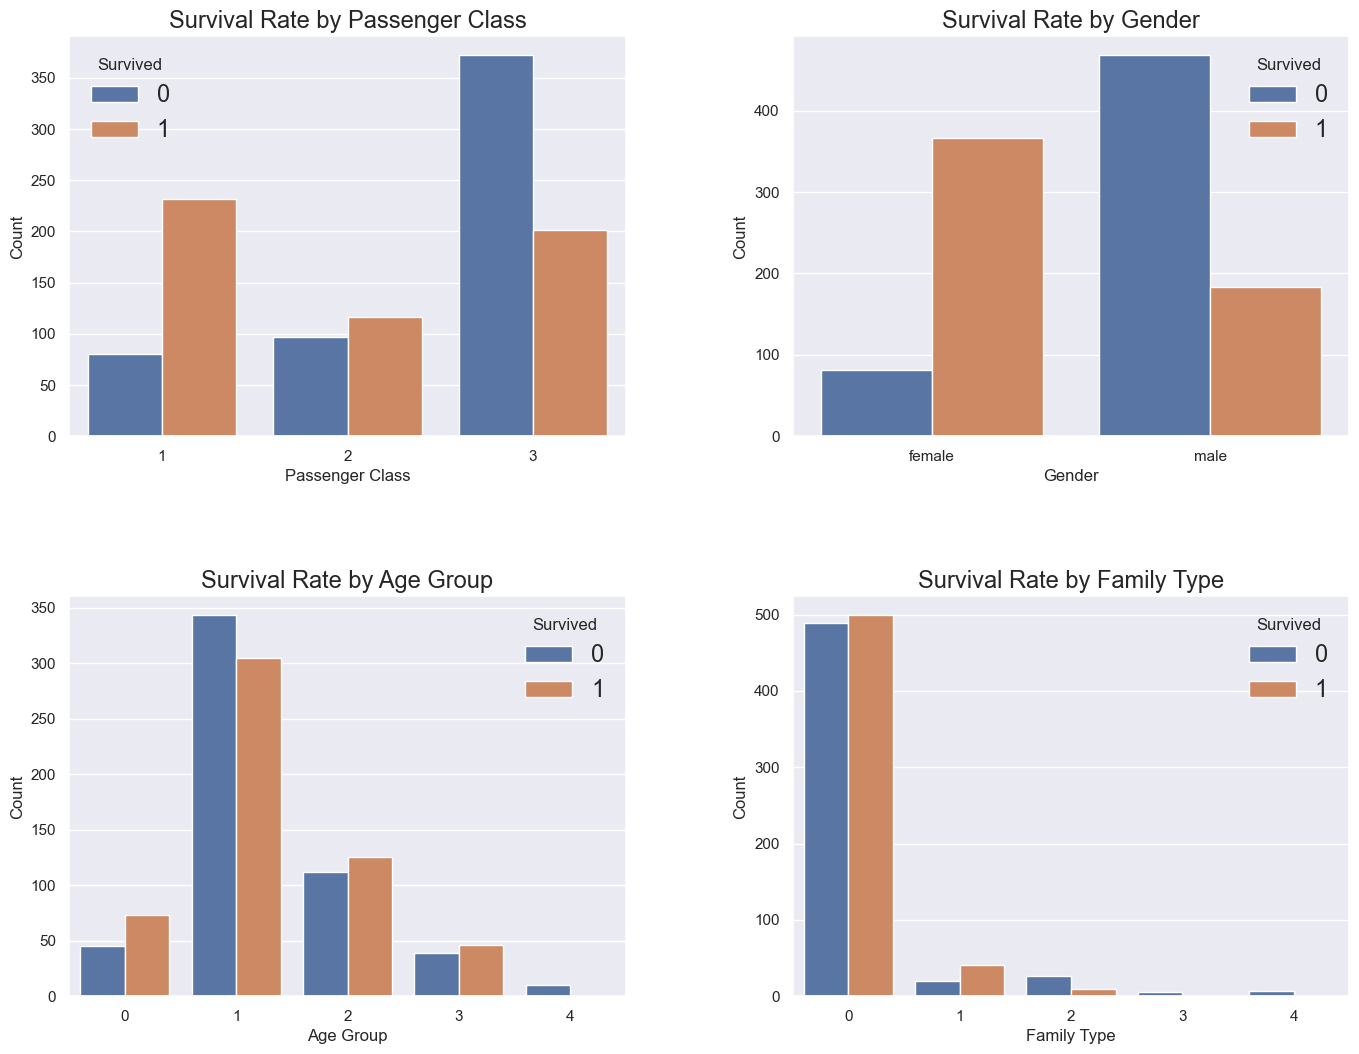

In [52]:
from common import plot_count_grid

columns_info = [
    ('Pclass', 'Survival Rate by Passenger Class', 'Passenger Class'),
    ('Sex', 'Survival Rate by Gender', 'Gender'),
    ('Age_Group', 'Survival Rate by Age Group', 'Age Group'),
    ('Family_Type', 'Survival Rate by Family Type', 'Family Type')
]

plot_count_grid(
    data=train_data, 
    columns_info=columns_info, 
    grid_size=(2, 2), 
    font_size=17,  # Larger font size for titles and labels
    tick_label_size=15,  # Larger font size for tick labels
    figsize=(16, 12), 
    hue_column='Survived',
    wspace=0.3,  # Adjust the padding between columns
    hspace=0.4,  # Adjust the padding between rows
    left=0.1,    # Adjust the left padding around the figure
    right=0.9,   # Adjust the right padding around the figure
    top=0.9,     # Adjust the top padding around the figure
    bottom=0.1   # Adjust the bottom padding around the figure
)

# Training

In [65]:
from titanic_train import main
bm = main()

14:24:47 | SUCCESS  | Start!
14:24:47 | DEBUG    | Getting Dataset!
14:24:47 | INFO     | Go Forth and Grid Search!
Fitting 5 folds for each of 3 candidates, totalling 15 fits
14:25:00 | INFO     | Best score        : 79.33%
14:25:00 | INFO     | Best parameters   : 
{'max_depth': 15,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 300}
14:25:00 | INFO     | Retraining best model on full training data
14:25:01 | INFO     | Predicting on Test Set


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Titles_Dona
Feature names seen at fit time, yet now missing:
- Titles_Col
- Titles_Don
- Titles_Jonkheer
- Titles_Lady
- Titles_Major
- ...
